In [63]:
from transformers import BertTokenizer, BertModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')



/home/remote/miniconda3/envs/kubi/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [1]:
import json

with open('temp.csv', 'r') as f:
    lines = f.readlines()
    
    for l in lines:
        print(l)
        break

"{'type': 'subject', 'text': 'tübbi-uu', 'parts': [{'type': 'noun', 'text': 'tübbi', 'definition': 'rock'}, {'type': 'subject_suffix', 'text': 'uu', 'definition': 'distal'}]}","{'type': 'object', 'text': 'toni-noka', 'parts': [{'type': 'noun', 'text': 'toni', 'definition': 'wickiup'}, {'type': 'object_suffix', 'text': 'oka', 'definition': 'distal'}]}","{'type': 'verb', 'text': ""ui-dama'i-gaa-wei"", 'parts': [{'type': 'object_pronoun', 'text': 'ui', 'definition': 'them (distal)'}, {'type': 'verb_stem', 'text': ""tama'i"", 'definition': 'find'}, {'type': 'tense', 'text': 'gaa-wei', 'definition': 'future (going to)'}]}"



In [6]:
json.loads(l)

JSONDecodeError: Extra data: line 1 column 176 (char 175)

In [1]:
import pandas as pd


df = pd.read_csv('translations.csv')

In [35]:
df

,sentence,translation,label
0,tei-zawa-ku ihi,This cooked us.,1
1,isha'-uu tüba-neika ai-hibi-pü,That coyote has drunk these pinenuts.,1
2,tüba-uu tsibui-dü,Those pinenuts climb.,1
3,ta-w̃ui-gaa-wei mahuw̃a,"They are going to write to us, you and I.",1
4,wo'ada-uu aaponu'-oka u-zawa-ti,The mosquito is cooking the apple.,1
...,...,...,...
95,pahabichi-uu küna-neika ma-zawa-ku,The bear cooked the wood.,1
96,isha'pugu-uu tabuutsi'-eika a-zawa-dü,That dog is cooking this cottontail.,1
97,katünu-uu pahabichi-noka u-naki-ku,The chair chased the bear.,1
98,küna-uu waakü-gaa-wei,That wood is going to work.,1


In [64]:
training_corpus = [df["sentence"][i: i + 10].values for i in range(0, len(df["sentence"]), 10)]


In [147]:
train_vals = df[['sentence', 'translation']][:80]
test_vals = df[['sentence', 'translation']][50:]

In [69]:
test_vals

,sentence,translation
80,tuunapi-neika mahu mai-gwati-ku,He/she/it hit the foods here.
81,isha'-eika nüügwa ai-w̃ui-gaa-wei,We are going to write coyotes.
82,pasohobü-uu toyabi-neika ma-hibi-pü,The tree has drunk the mountain.
83,aingwü-uu aaponu'-eika ai-naka-ti,The squirrel is hearing these apples.
84,tabuutsi'-uu wai-noka u-yadohi-pü,The cottontail has talked to the rice.
85,katünu-noka mahuw̃a ui-gwati-dü,They are hitting those chairs.
86,tüwoobü-neika uhuw̃a mai-buni-ti,They are seeing these earths.
87,koopi'-uu hukaw̃ia-ti,Coffee is walking.
88,küna-ii ni-naka-ti,This wood is hearing us.
89,toyabi-neika taagwa ma-buni-gaa-wei,We are going to see this mountain.


In [25]:
training_corpus[-1]

array(['pahabichi-uu küna-neika ma-zawa-ku',
       "isha'pugu-uu tabuutsi'-eika a-zawa-dü",
       'katünu-uu pahabichi-noka u-naki-ku', 'küna-uu waakü-gaa-wei',
       'pugu-neika mahu ai-naka-ku'], dtype=object)

In [7]:
tokenizer.vocab_size

119547

In [66]:
new_tokenizer = tokenizer.train_new_from_iterator(training_corpus, 129547)

In [161]:
#original tokenizer
tokenizer.tokenize(test_vals['sentence'].iloc[0])

['t', '##si', '##bu', '##i', '-', 'wei', 'ta', '##a']

In [162]:
# fine-tuned tokenizer
new_tokenizer.tokenize(test_vals['sentence'].iloc[0])

['tsibui', '-', 'wei', 'taa']

In [157]:
import torch
def cls_pooling(model_output, attention_mask):
    return model_output[0][:,0]


tokenizer_to_use = tokenizer

sentences = test_vals['sentence'].values.tolist()
# Tokenize sentences
encoded_input = tokenizer_to_use(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
sentence_embeddings = cls_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)





sentences = test_vals['translation'].values.tolist()
# Tokenize sentences
encoded_input = tokenizer_to_use(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, max pooling.
en_sentence_embeddings = cls_pooling(model_output, encoded_input['attention_mask'])



Sentence embeddings:
tensor([[ 0.0034,  0.0553,  0.5532,  ...,  0.0030, -0.0291, -0.0783],
        [ 0.0588,  0.1966,  0.4886,  ...,  0.0415, -0.1350, -0.0946],
        [ 0.2304,  0.1436,  0.4973,  ...,  0.2996, -0.2406, -0.0230],
        ...,
        [ 0.0738,  0.2277,  0.4389,  ..., -0.0287, -0.0855, -0.0194],
        [ 0.1105,  0.1314,  0.4389,  ...,  0.3202,  0.0032, -0.1353],
        [ 0.0147,  0.2008,  0.2500,  ...,  0.2647, -0.0316, -0.1673]])


In [158]:
from sentence_transformers import SentenceTransformer, util

outputs = []
for idx in range(sentence_embeddings.shape[0]):
    pt_embedding = sentence_embeddings[idx]

    for jdx in range(test_vals.shape[0]):
        en_embedding = en_sentence_embeddings[jdx]
        cosine_scores = util.cos_sim(pt_embedding, en_embedding)

        out = {
            'p_idx': idx,
            'pt_sentece': test_vals.iloc[idx]['sentence'],
            'en_sentece': test_vals.iloc[jdx]['translation'],
            'e_idx': jdx,
            'score': cosine_scores.detach().numpy()[0][0],
            'model': 'student'
        }
        outputs.append(out)
results = pd.DataFrame(outputs)
results


,p_idx,pt_sentece,en_sentece,e_idx,score,model
0,0,tsibui-wei taa,You and I will climb.,0,0.594946,student
1,0,tsibui-wei taa,That horse chased those worms.,1,0.557217,student
2,0,tsibui-wei taa,The lizard is going to visit the rice.,2,0.736889,student
3,0,tsibui-wei taa,He/she/it is smiling.,3,0.734633,student
4,0,tsibui-wei taa,This weasel is going to chase this earth.,4,0.611760,student
...,...,...,...,...,...,...
2495,49,pugu-neika mahu ai-naka-ku,The bear cooked the wood.,45,0.713828,student
2496,49,pugu-neika mahu ai-naka-ku,That dog is cooking this cottontail.,46,0.669343,student
2497,49,pugu-neika mahu ai-naka-ku,The chair chased the bear.,47,0.728471,student
2498,49,pugu-neika mahu ai-naka-ku,That wood is going to work.,48,0.703579,student


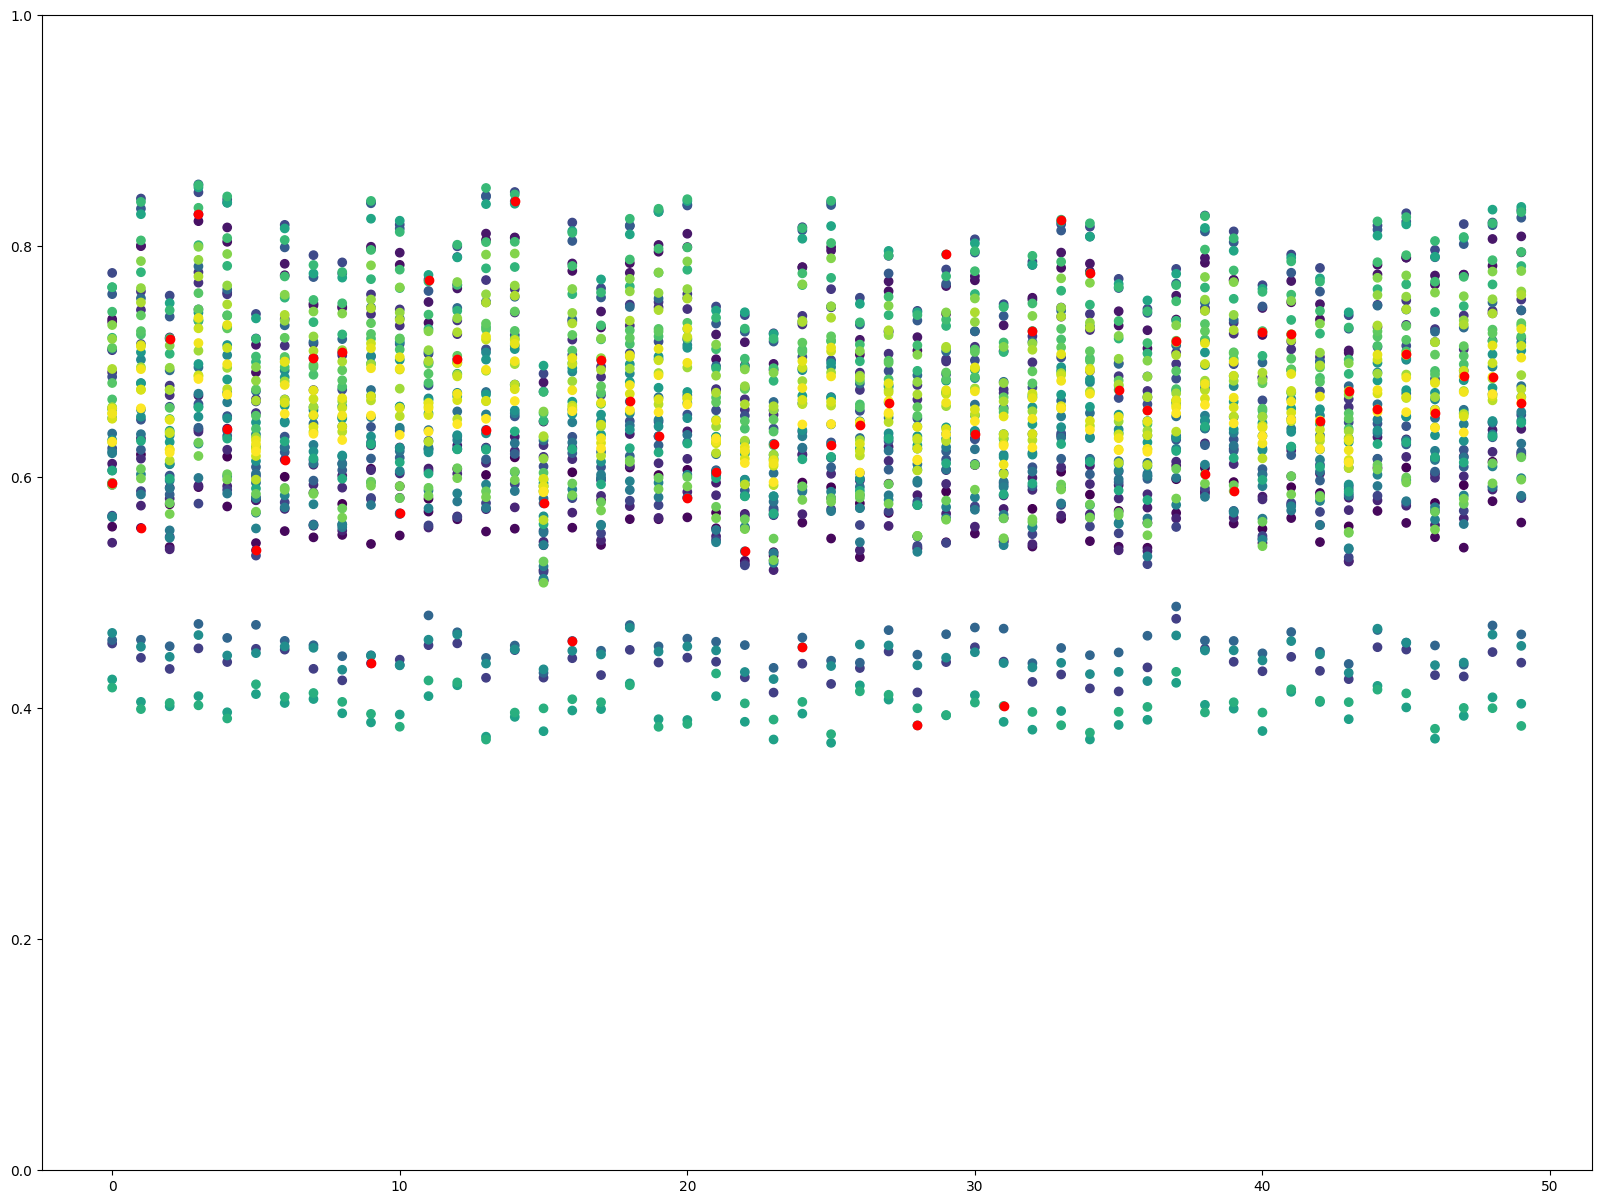

In [159]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
for row in list(results.groupby('p_idx')):
    temp = row[1]
    

    plt.scatter(temp['p_idx'], temp['score'], c=temp['e_idx'])
    correct_score = temp[temp["e_idx"]==row[0]]['score'].values[0]
    plt.scatter(row[0], correct_score, c='red')
    plt.ylim(0, 1)
    

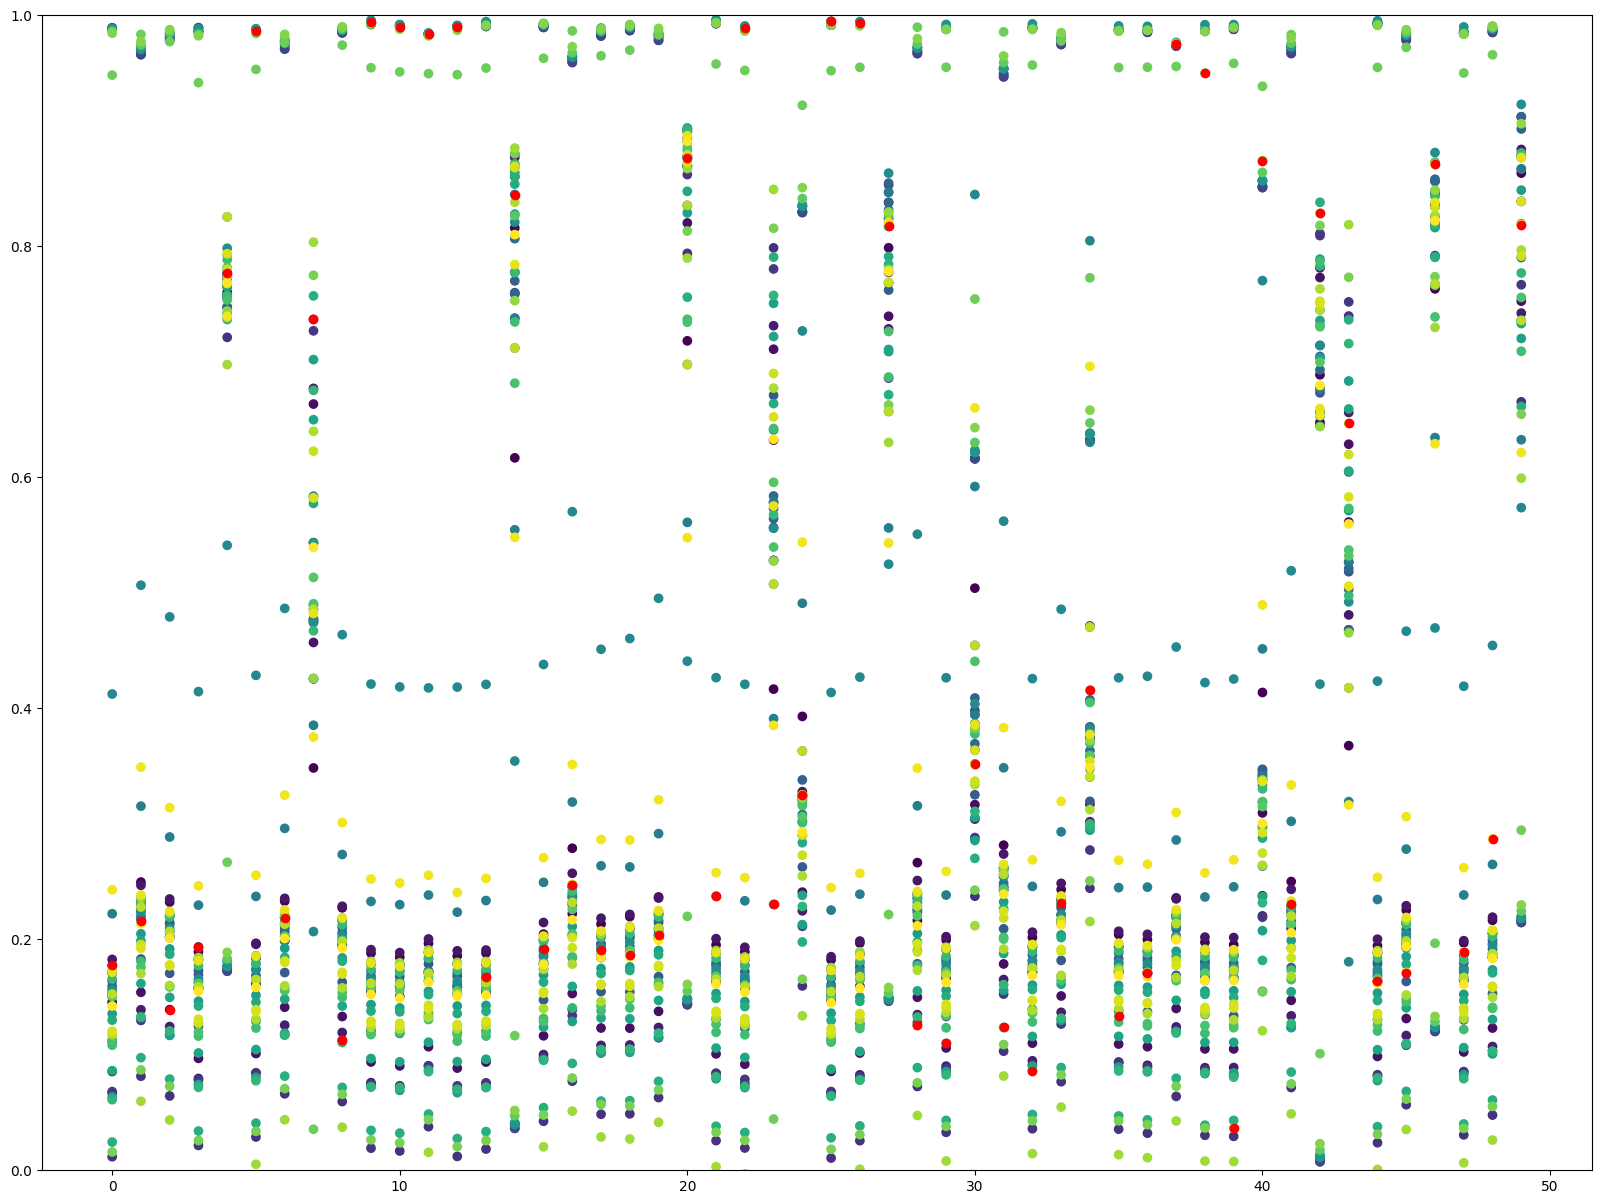

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
for row in list(results.groupby('p_idx')):
    temp = row[1]
    

    plt.scatter(temp['p_idx'], temp['score'], c=temp['e_idx'])
    correct_score = temp[temp["e_idx"]==row[0]]['score'].values[0]
    plt.scatter(row[0], correct_score, c='red')
    plt.ylim(0, 1)


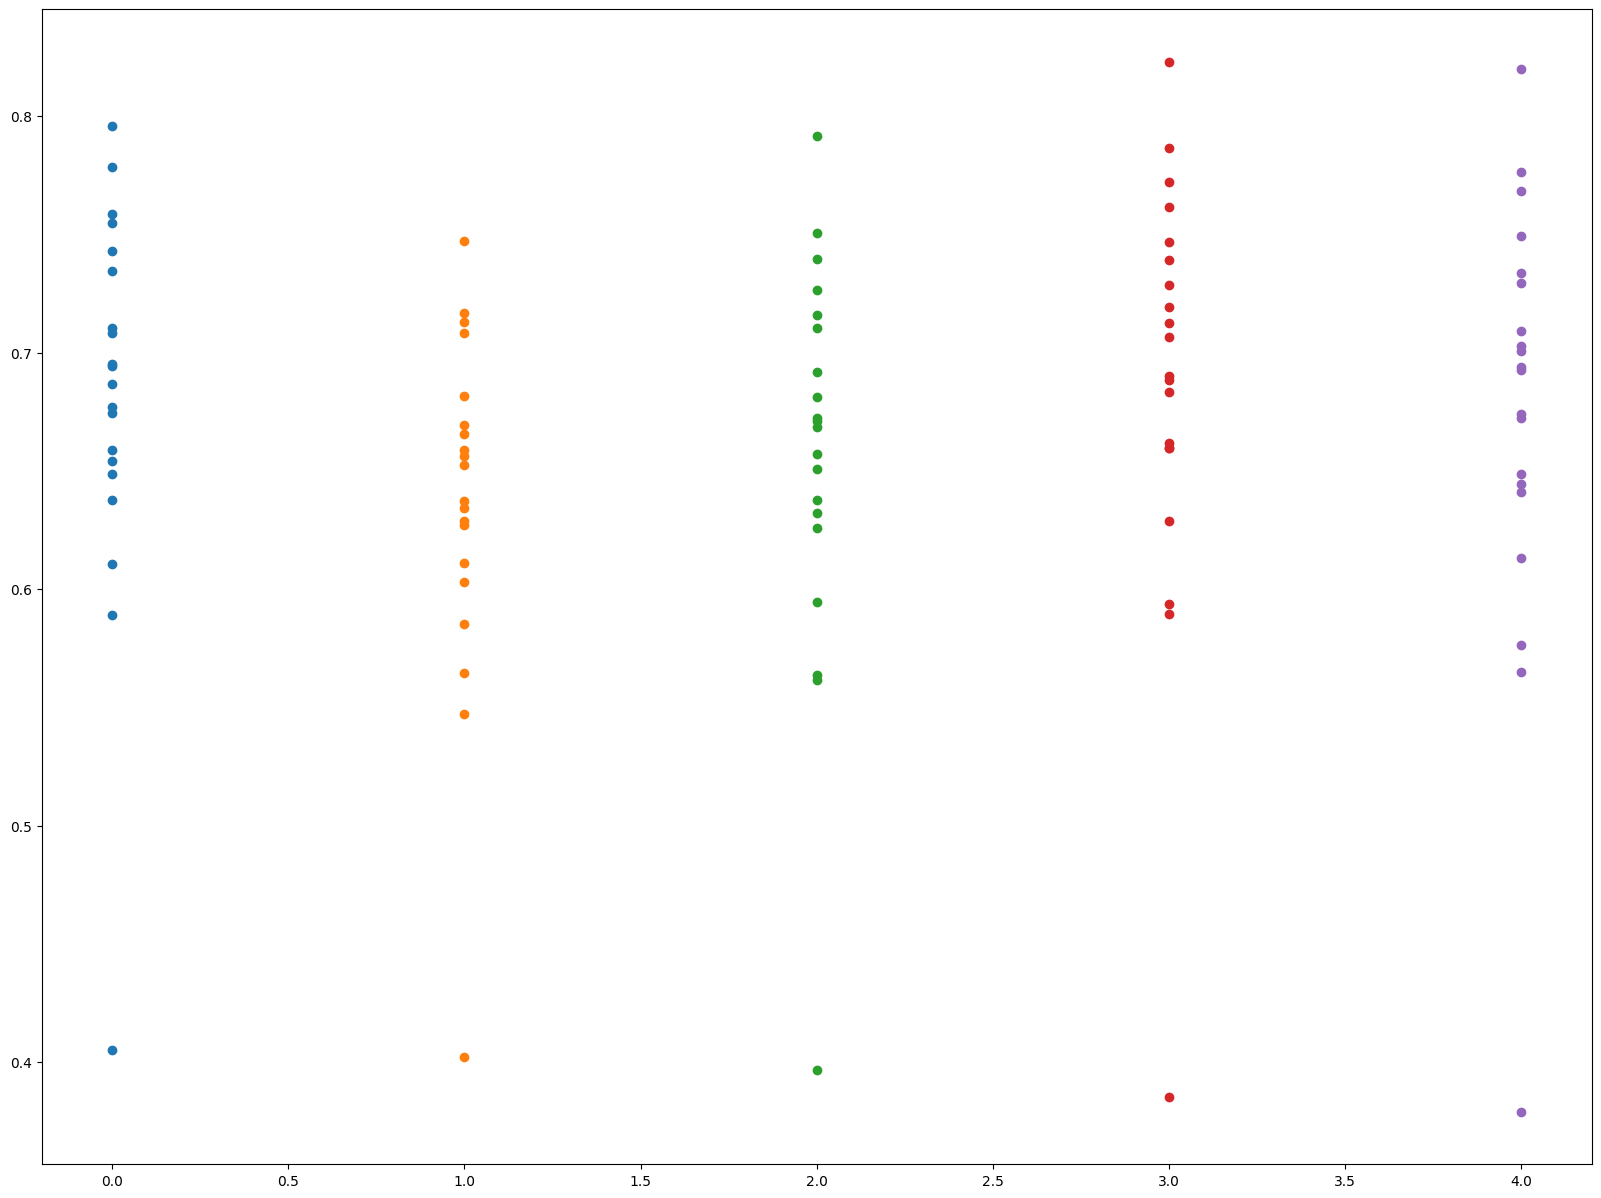

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
for idx in range(5):
    temp = list(results.groupby('p_idx'))[idx][1]
    

    plt.scatter(temp['p_idx'], temp['score'], c=temp['e_idx'])

In [32]:
new_tokenizer.tokenize(training_corpus[3][0])

['mukita',
 '-',
 'uu',
 'isha',
 "'",
 'pugu',
 '-',
 'noka',
 'u',
 '-',
 'naki',
 '-',
 'ti']

In [49]:
from sentence_transformers import SentenceTransformer, LoggingHandler, models, evaluation, losses
from torch.utils.data import DataLoader
from sentence_transformers.datasets import ParallelSentencesDataset
from datetime import datetime

teacher_model_name = (
    "paraphrase-distilroberta-base-v2"  # Our monolingual teacher model, we want to convert to multiple languages
)
student_model_name = "xlm-roberta-base"  # Multilingual base model we use to imitate the teacher model

max_seq_length = 128  # Student model max. lengths for inputs (number of word pieces)
train_batch_size = 64  # Batch size for training
inference_batch_size = 64  # Batch size at inference
max_sentences_per_trainfile = 500000  # Maximum number of  parallel sentences for training
train_max_sentence_length = 250  # Maximum length (characters) for parallel training sentences

num_epochs = 200  # Train for x epochs
num_warmup_steps = 10000  # Warumup steps

num_evaluation_steps = 1000  # Evaluate performance after every xxxx steps


output_path = "output/make-multilingual-sys-" + datetime.now().strftime("%Y-%m-%d_%H-%M-%S")



In [4]:
teacher_model = SentenceTransformer(teacher_model_name)


word_embedding_model = models.Transformer(student_model_name, max_seq_length=max_seq_length)
# Apply mean pooling to get one fixed sized sentence vector
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
student_model = SentenceTransformer(modules=[word_embedding_model, pooling_model])


###### Read Parallel Sentences Dataset ######
train_data = ParallelSentencesDataset(
    student_model=student_model, teacher_model=teacher_model, batch_size=inference_batch_size, use_embedding_cache=True
)



/home/remote/miniconda3/envs/kubi/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
train_data.add_dataset(train_vals)

In [46]:
train_data

In [6]:


train_dataloader = DataLoader(train_data, shuffle=True, batch_size=train_batch_size)
train_loss = losses.MSELoss(model=student_model)


In [50]:
# Train the model
student_model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=num_epochs,
    warmup_steps=num_warmup_steps,
    evaluation_steps=num_evaluation_steps,
    output_path=output_path,
    save_best_model=True,
    optimizer_params={"lr": 2e-5, "eps": 1e-6},
)

Epoch: 100%|██████████| 200/200 [00:09<00:00, 20.05it/s]


In [ ]:
student_model.loss

In [20]:
test_vals

,sentence,translation
80,tuunapi-neika mahu mai-gwati-ku,He/she/it hit the foods here.
81,isha'-eika nüügwa ai-w̃ui-gaa-wei,We are going to write coyotes.
82,pasohobü-uu toyabi-neika ma-hibi-pü,The tree has drunk the mountain.
83,aingwü-uu aaponu'-eika ai-naka-ti,The squirrel is hearing these apples.
84,tabuutsi'-uu wai-noka u-yadohi-pü,The cottontail has talked to the rice.
85,katünu-noka mahuw̃a ui-gwati-dü,They are hitting those chairs.
86,tüwoobü-neika uhuw̃a mai-buni-ti,They are seeing these earths.
87,koopi'-uu hukaw̃ia-ti,Coffee is walking.
88,küna-ii ni-naka-ti,This wood is hearing us.
89,toyabi-neika taagwa ma-buni-gaa-wei,We are going to see this mountain.


SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [60]:
student_model.tokenizer.tokenize('hello')

['▁hell', 'o']

In [62]:
student_model.tokenizer.tokenize(pt_sentence)

['▁pu', 'gu', '-', 'ne', 'ika', '▁mahu', '▁ai', '-', 'nak', 'a', '-', 'ku']

In [51]:
from sentence_transformers import SentenceTransformer, util

outputs = []
for idx in range(test_vals.shape[0]):
    pt_sentence = test_vals['sentence'].iloc[idx]
    pt_embedding = student_model.encode(pt_sentence)

    for jdx in range(test_vals.shape[]):
        en_sentence = test_vals['translation'].iloc[jdx]

        en_embedding = student_model.encode(en_sentence)
        cosine_scores = util.cos_sim(pt_embedding, en_embedding)

        out = {
            'paiute': pt_sentence,
            'p_idx': idx,
            'english': en_sentence,
            'e_idx': jdx,
            'score': cosine_scores.detach().numpy()[0][0],
            'model': 'student'
        }
        outputs.append(out)

    
for idx in range(test_vals.shape[0]):
    pt_sentence = test_vals['sentence'].iloc[idx]
    pt_embedding = teacher_model.encode(pt_sentence)

    for jdx in range(test_vals.shape[0]):
        en_sentence = test_vals['translation'].iloc[jdx]

        en_embedding = teacher_model.encode(en_sentence)
        cosine_scores = util.cos_sim(pt_embedding, en_embedding)

        out = {
            'paiute': pt_sentence,
            'p_idx': idx,
            'english': en_sentence,
            'e_idx': jdx,
            'score': cosine_scores.detach().numpy()[0][0],
            'model': 'teacher_model'
        }
        outputs.append(out)

In [52]:
results = pd.DataFrame(outputs)
results


,paiute,p_idx,english,e_idx,score,model
0,tuunapi-neika mahu mai-gwati-ku,0,He/she/it hit the foods here.,0,0.996174,student
1,tuunapi-neika mahu mai-gwati-ku,0,We are going to write coyotes.,1,0.994351,student
2,tuunapi-neika mahu mai-gwati-ku,0,The tree has drunk the mountain.,2,0.991768,student
3,tuunapi-neika mahu mai-gwati-ku,0,The squirrel is hearing these apples.,3,0.994616,student
4,tuunapi-neika mahu mai-gwati-ku,0,The cottontail has talked to the rice.,4,0.994287,student
...,...,...,...,...,...,...
795,pugu-neika mahu ai-naka-ku,19,The bear cooked the wood.,15,0.037309,teacher_model
796,pugu-neika mahu ai-naka-ku,19,That dog is cooking this cottontail.,16,0.026684,teacher_model
797,pugu-neika mahu ai-naka-ku,19,The chair chased the bear.,17,-0.049627,teacher_model
798,pugu-neika mahu ai-naka-ku,19,That wood is going to work.,18,0.094768,teacher_model


In [53]:
for idx in range(5):
    temp = list(results.groupby('p_idx'))[idx][1]
    break
    print(idx, temp['score'].argmax())

In [54]:
temp

,paiute,p_idx,english,e_idx,score,model
0,tuunapi-neika mahu mai-gwati-ku,0,He/she/it hit the foods here.,0,0.996174,student
1,tuunapi-neika mahu mai-gwati-ku,0,We are going to write coyotes.,1,0.994351,student
2,tuunapi-neika mahu mai-gwati-ku,0,The tree has drunk the mountain.,2,0.991768,student
3,tuunapi-neika mahu mai-gwati-ku,0,The squirrel is hearing these apples.,3,0.994616,student
4,tuunapi-neika mahu mai-gwati-ku,0,The cottontail has talked to the rice.,4,0.994287,student
5,tuunapi-neika mahu mai-gwati-ku,0,They are hitting those chairs.,5,0.993645,student
6,tuunapi-neika mahu mai-gwati-ku,0,They are seeing these earths.,6,0.992518,student
7,tuunapi-neika mahu mai-gwati-ku,0,Coffee is walking.,7,0.972874,student
8,tuunapi-neika mahu mai-gwati-ku,0,This wood is hearing us.,8,0.991111,student
9,tuunapi-neika mahu mai-gwati-ku,0,We are going to see this mountain.,9,0.992377,student


In [46]:
temp

,paiute,p_idx,english,e_idx,score,model
80,tabuutsi'-uu wai-noka u-yadohi-pü,4,He/she/it hit the foods here.,0,0.996021,student
81,tabuutsi'-uu wai-noka u-yadohi-pü,4,We are going to write coyotes.,1,0.994270,student
82,tabuutsi'-uu wai-noka u-yadohi-pü,4,The tree has drunk the mountain.,2,0.994010,student
83,tabuutsi'-uu wai-noka u-yadohi-pü,4,The squirrel is hearing these apples.,3,0.994845,student
84,tabuutsi'-uu wai-noka u-yadohi-pü,4,The cottontail has talked to the rice.,4,0.994598,student
85,tabuutsi'-uu wai-noka u-yadohi-pü,4,They are hitting those chairs.,5,0.993961,student
86,tabuutsi'-uu wai-noka u-yadohi-pü,4,They are seeing these earths.,6,0.993726,student
87,tabuutsi'-uu wai-noka u-yadohi-pü,4,Coffee is walking.,7,0.986604,student
88,tabuutsi'-uu wai-noka u-yadohi-pü,4,This wood is hearing us.,8,0.992587,student
89,tabuutsi'-uu wai-noka u-yadohi-pü,4,We are going to see this mountain.,9,0.992778,student


In [30]:
cosine_scores.detach().numpy()[0][0]

0.13877553

In [10]:
from sentence_transformers import SentenceTransformer, util


cosine_scores = util.cos_sim(pt_val, en_val)

cosine_scores

tensor([[0.9967]])

In [11]:
pt_val = teacher_model.encode(test_vals['sentence'].iloc[0])
en_val = teacher_model.encode(test_vals['translation'].iloc[0])
print(util.cos_sim(pt_val, en_val))

tensor([[0.1526]])
